### Data Dictionary

Predict 2009 Bucket

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import keras
from keras.models import save_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense
from keras.optimizers import Adam

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

from tpot import TPOTClassifier, TPOTRegressor

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

### Data Exploration

In [2]:
df = pd.read_csv("ClaimsData.csv")

In [3]:
df

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heartfailure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
0,85,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,59,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,52,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458000,61,1,0,0,1,1,1,1,1,1,1,1,15960,3,154000,5
458001,90,1,0,0,1,1,1,1,1,1,0,0,26870,4,155010,5
458002,76,0,1,0,1,1,1,1,1,1,1,1,89140,5,155810,5
458003,82,1,0,0,1,0,1,1,1,1,1,1,20660,4,158800,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458005 entries, 0 to 458004
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   age                458005 non-null  int64
 1   alzheimers         458005 non-null  int64
 2   arthritis          458005 non-null  int64
 3   cancer             458005 non-null  int64
 4   copd               458005 non-null  int64
 5   depression         458005 non-null  int64
 6   diabetes           458005 non-null  int64
 7   heartfailure       458005 non-null  int64
 8   ihd                458005 non-null  int64
 9   kidney             458005 non-null  int64
 10  osteoporosis       458005 non-null  int64
 11  stroke             458005 non-null  int64
 12  reimbursement2008  458005 non-null  int64
 13  bucket2008         458005 non-null  int64
 14  reimbursement2009  458005 non-null  int64
 15  bucket2009         458005 non-null  int64
dtypes: int64(16)
memory usage: 55.9 MB


In [5]:
df.describe(include='all')

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heartfailure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
count,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000
mean,72.628401,0.192214,0.154293,0.064106,0.136071,0.213076,0.380463,0.284744,0.420063,0.161153,0.173996,0.044792,4004.963854,1.436862,4277.432823,1.522160
std,12.557114,0.394041,0.361230,0.244942,0.342864,0.409482,0.485501,0.451293,0.493569,0.367673,0.379106,0.206847,9784.064063,0.861955,8480.041283,0.870425
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,130.000000,1.000000
50%,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,950.000000,1.000000,1540.000000,1.000000
75%,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3110.000000,2.000000,4220.000000,2.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,221640.000000,5.000000,189930.000000,5.000000


In [6]:
df.shape

(458005, 16)

In [7]:
df.columns

Index(['age', 'alzheimers', 'arthritis', 'cancer', 'copd', 'depression',
       'diabetes', 'heartfailure', 'ihd', 'kidney', 'osteoporosis', 'stroke',
       'reimbursement2008', 'bucket2008', 'reimbursement2009', 'bucket2009'],
      dtype='object')

### Data Visualization

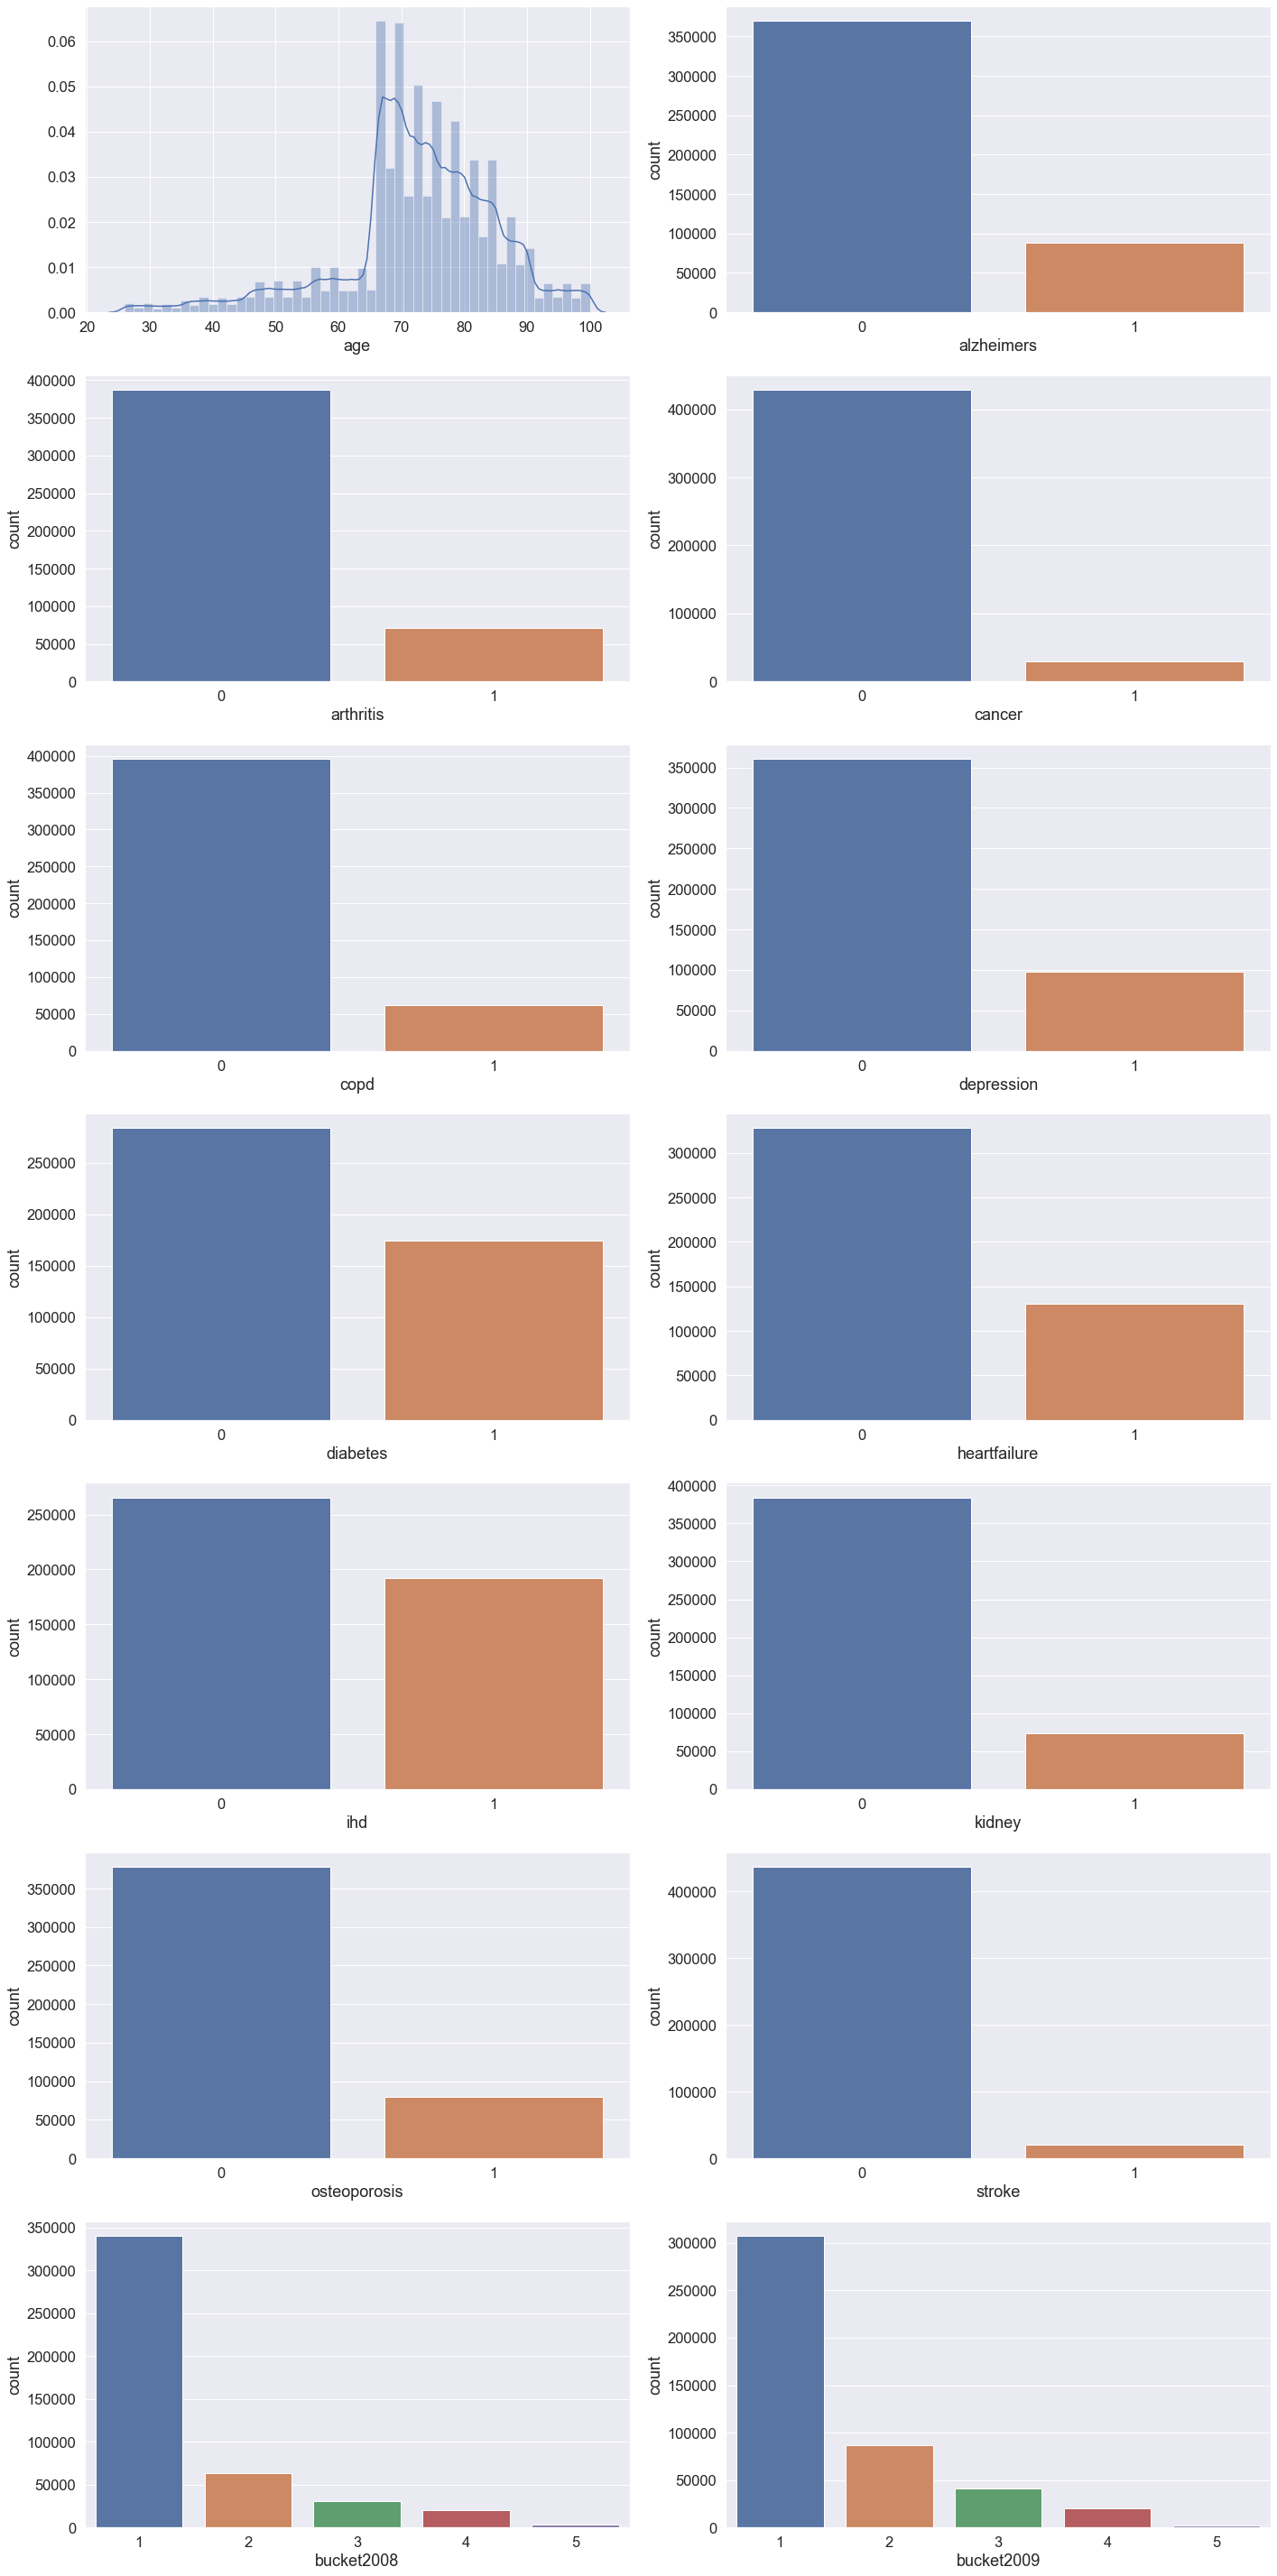

In [8]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.distplot(df.age)
plt.subplot(7,2,2)
sns.countplot(df.alzheimers)
plt.subplot(7,2,3)
sns.countplot(df.arthritis)
plt.subplot(7,2,4)
sns.countplot(df.cancer)
plt.subplot(7,2,5)
sns.countplot(df.copd)
plt.subplot(7,2,6)
sns.countplot(df.depression)
plt.subplot(7,2,7)
sns.countplot(df.diabetes)
plt.subplot(7,2,8)
sns.countplot(df.heartfailure)
plt.subplot(7,2,9)
sns.countplot(df.ihd)
plt.subplot(7,2,10)
sns.countplot(df.kidney)
plt.subplot(7,2,11)
sns.countplot(df.osteoporosis)
plt.subplot(7,2,12)
sns.countplot(df.stroke)
plt.subplot(7,2,13)
sns.countplot(df.bucket2008)
plt.subplot(7,2,14)
sns.countplot(df.bucket2009)

plt.tight_layout()
plt.show()

In [9]:
df.corr()

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heartfailure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
age,1.000000,0.045560,0.041785,0.037600,0.043951,0.015835,0.066947,0.066837,0.073478,0.055876,0.039568,0.035573,0.048245,0.064908,0.038485,0.050100
alzheimers,0.045560,1.000000,0.205927,0.137481,0.281509,0.289402,0.340015,0.333345,0.325732,0.302539,0.190977,0.219707,0.312666,0.375214,0.225473,0.274621
arthritis,0.041785,0.205927,1.000000,0.118788,0.217828,0.230455,0.323477,0.264371,0.310285,0.249859,0.219531,0.116115,0.248839,0.329098,0.201986,0.270990
cancer,0.037600,0.137481,0.118788,1.000000,0.174652,0.120639,0.180301,0.174244,0.192259,0.187658,0.113057,0.101049,0.245122,0.297382,0.159064,0.210775
copd,0.043951,0.281509,0.217828,0.174652,1.000000,0.262975,0.335929,0.376426,0.340516,0.360823,0.183722,0.208532,0.414010,0.481202,0.262506,0.311433
depression,0.015835,0.289402,0.230455,0.120639,0.262975,1.000000,0.346871,0.303942,0.323910,0.274224,0.192910,0.157882,0.274570,0.341324,0.225122,0.282856
diabetes,0.066947,0.340015,0.323477,0.180301,0.335929,0.346871,1.000000,0.446579,0.514614,0.411191,0.274494,0.193300,0.348878,0.440731,0.312971,0.389335
heartfailure,0.066837,0.333345,0.264371,0.174244,0.376426,0.303942,0.446579,1.000000,0.467780,0.419739,0.221921,0.221674,0.396553,0.483603,0.302198,0.365463
ihd,0.073478,0.325732,0.310285,0.192259,0.340516,0.323910,0.514614,0.467780,1.000000,0.378230,0.265739,0.194473,0.361372,0.458416,0.312247,0.389230
kidney,0.055876,0.302539,0.249859,0.187658,0.360823,0.274224,0.411191,0.419739,0.378230,1.000000,0.192819,0.231422,0.482072,0.556431,0.318839,0.369269


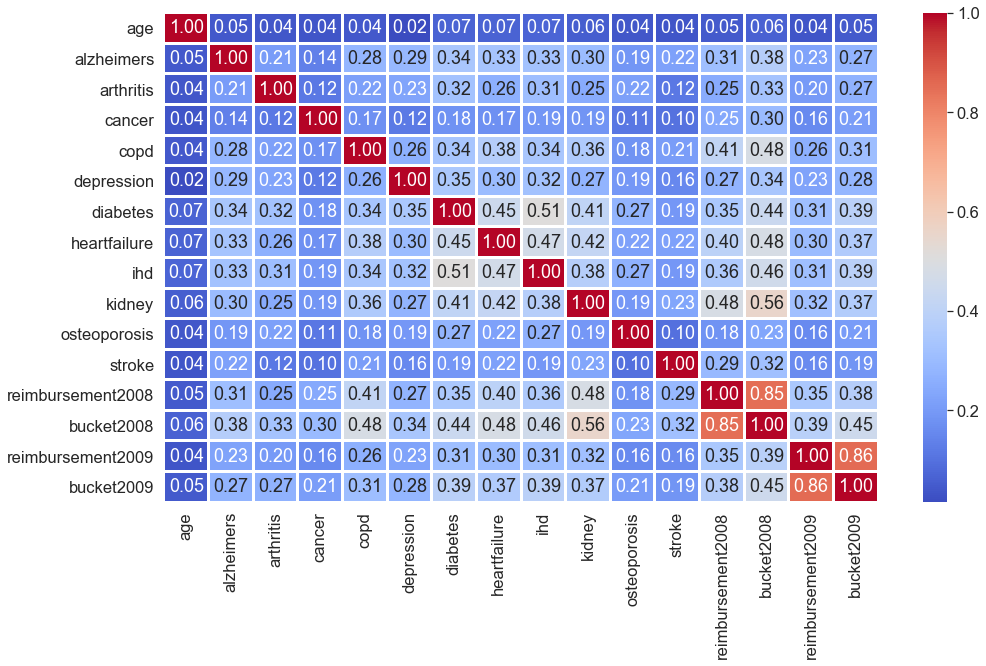

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

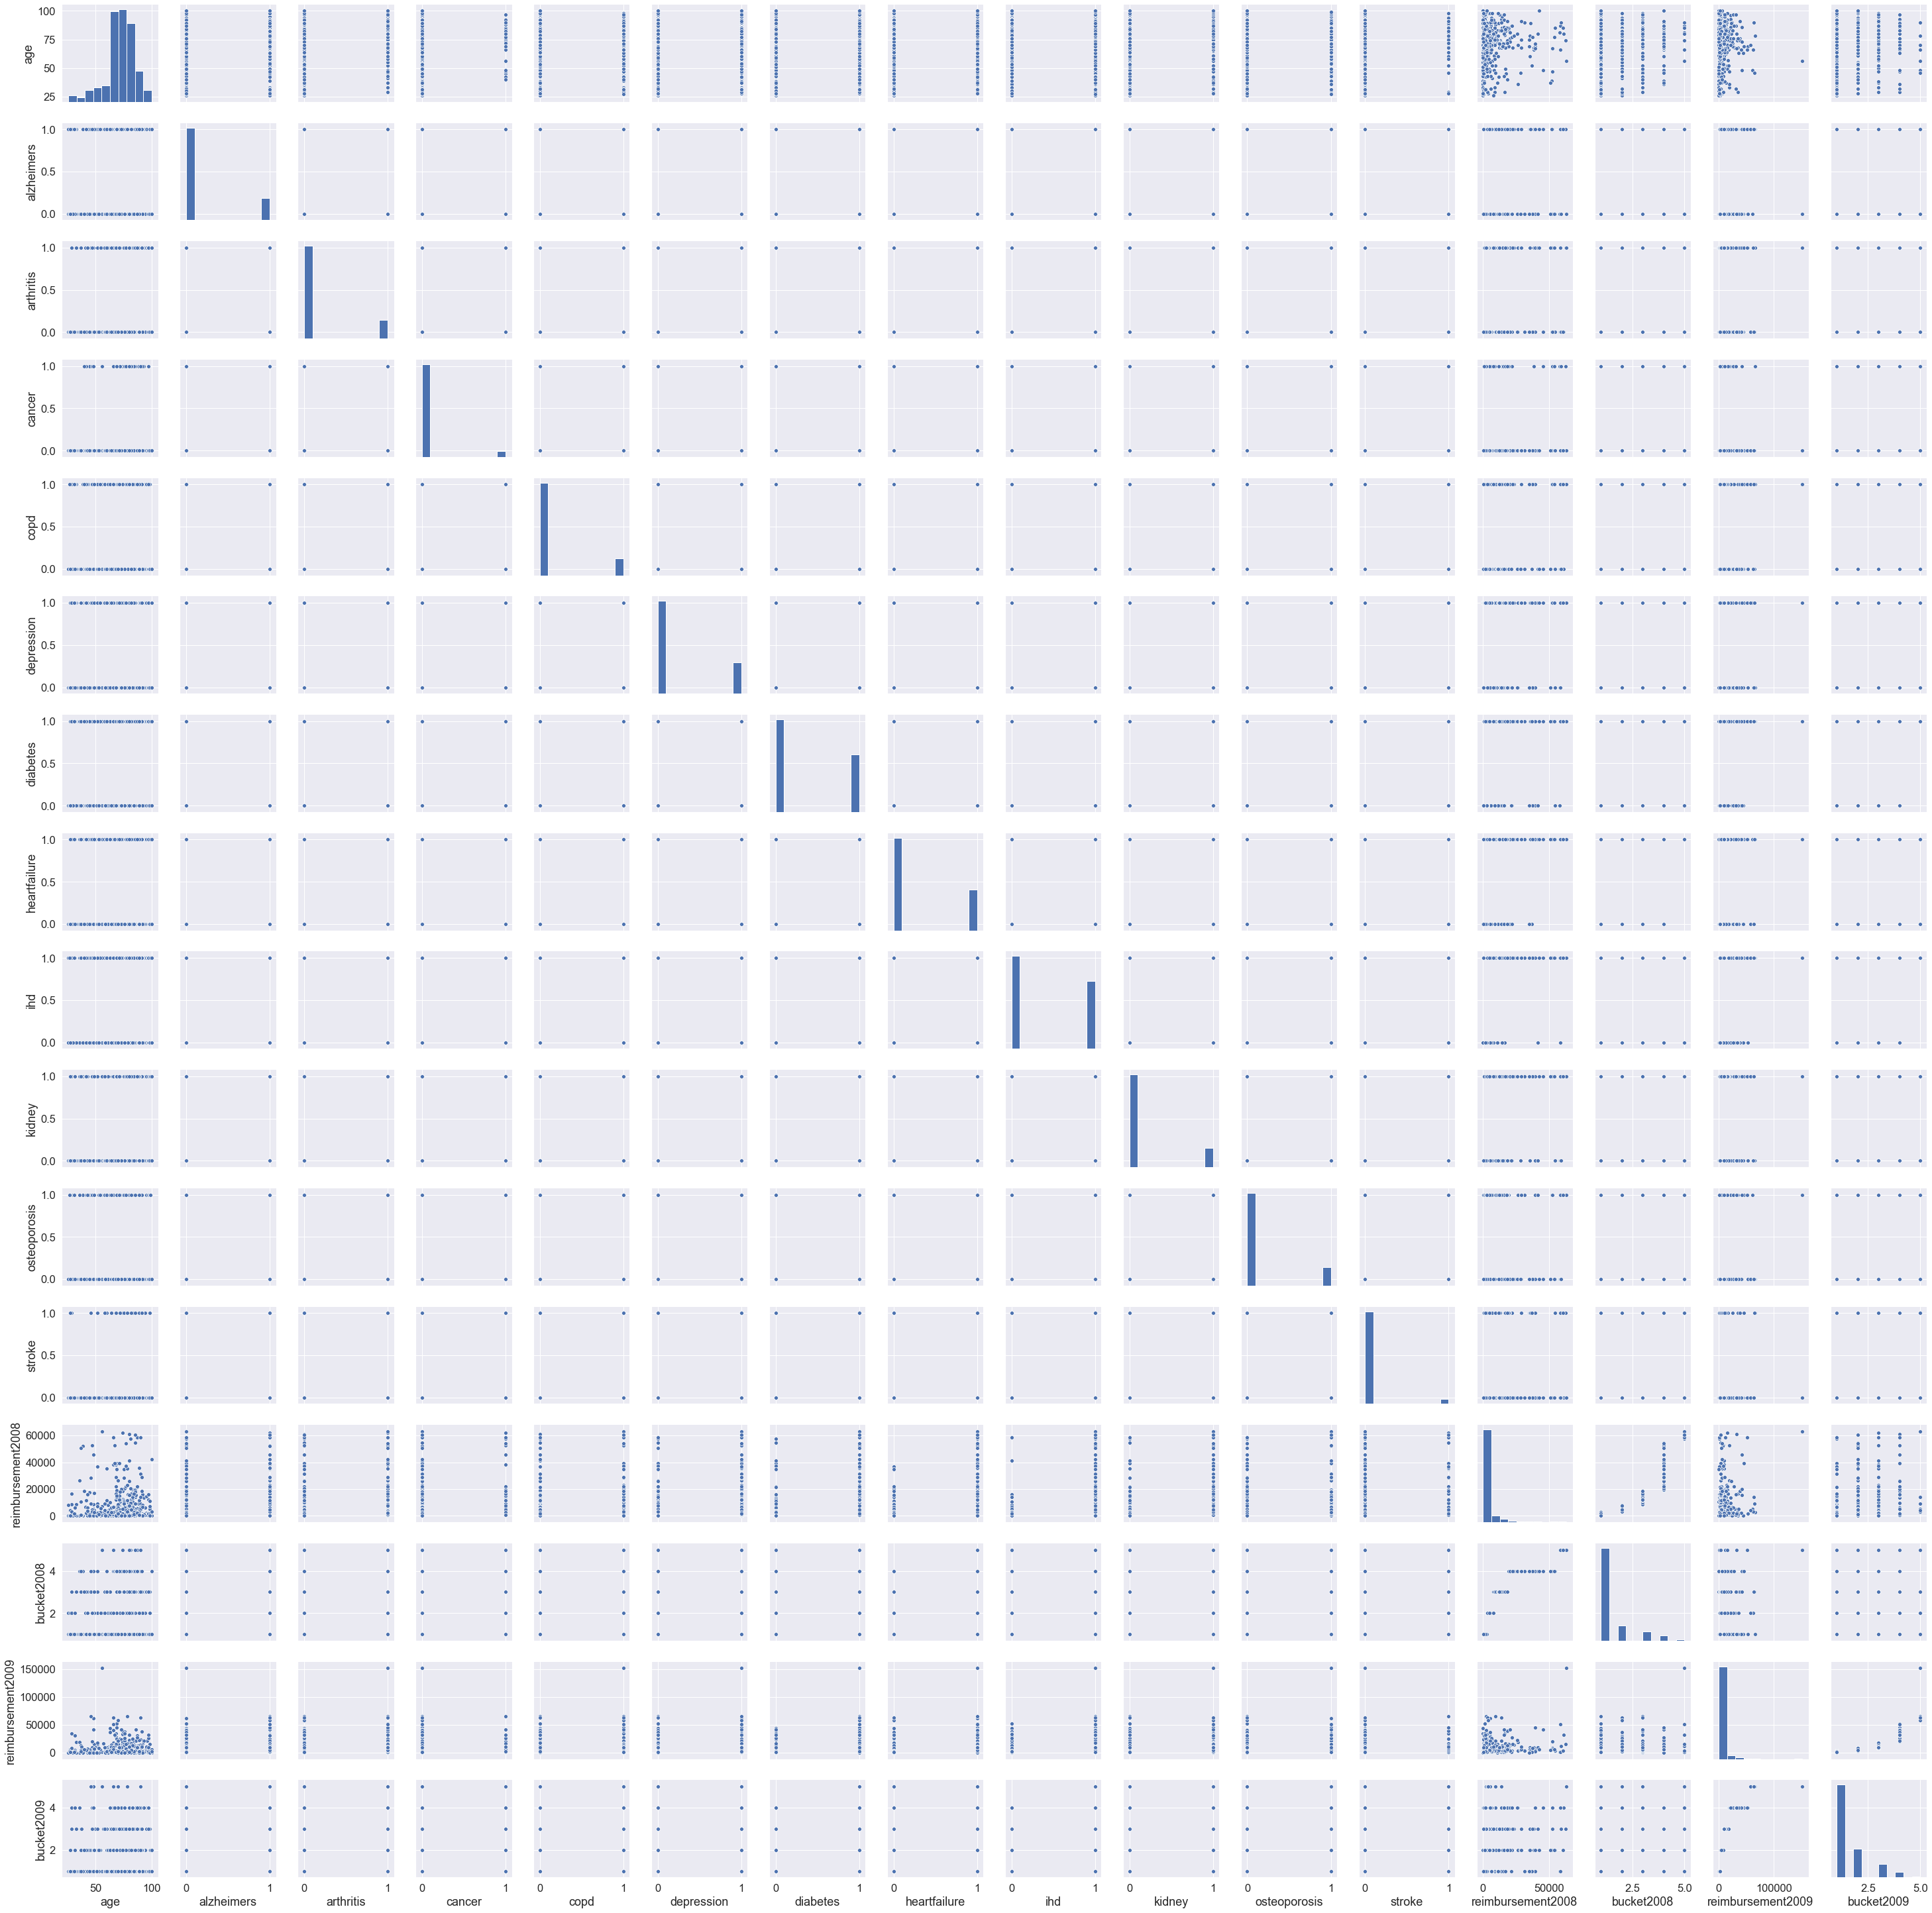

In [11]:
sns.pairplot(df.sample(1000))
plt.show()

### Data Preprocessing

### Treat Missing Values

In [12]:
df.isnull().sum()

age                  0
alzheimers           0
arthritis            0
cancer               0
copd                 0
depression           0
diabetes             0
heartfailure         0
ihd                  0
kidney               0
osteoporosis         0
stroke               0
reimbursement2008    0
bucket2008           0
reimbursement2009    0
bucket2009           0
dtype: int64

### Treat Duplicate Values

In [13]:
df.duplicated(keep='first').sum()

117057

In [14]:
df[df.duplicated(keep=False)]

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heartfailure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
0,85,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,59,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,52,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424017,76,0,0,0,0,0,0,0,0,0,0,0,0,1,14210,3
424862,68,0,0,0,0,0,0,0,0,0,0,0,0,1,14460,3
424863,68,0,0,0,0,0,0,0,0,0,0,0,0,1,14460,3
425103,66,0,0,0,0,0,0,0,0,0,0,0,0,1,14540,3


In [15]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [16]:
df.duplicated(keep='first').sum()

0

### Treat Imbalance Data

In [17]:
df['bucket2009'].value_counts()

1    190466
2     87033
3     40963
4     19843
5      2643
Name: bucket2009, dtype: int64

In [18]:
one = df[df['bucket2009'] == 1]

In [19]:
one

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heartfailure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
0,85,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,59,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,52,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,68,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190461,98,1,0,0,1,0,1,1,1,1,1,0,47010,4,2990,1
190462,85,0,0,0,1,0,1,1,1,1,1,1,47660,4,2990,1
190463,37,1,0,0,1,1,1,1,1,1,1,0,58000,5,2990,1
190464,82,1,0,0,0,0,0,1,1,1,0,1,58640,5,2990,1


In [20]:
one = one.sample(frac=0.5).reset_index(drop=True)

In [21]:
one

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heartfailure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
0,68,0,0,0,1,0,1,0,0,0,0,0,1480,1,570,1
1,49,1,0,0,0,0,0,0,0,0,0,0,0,1,810,1
2,93,0,0,0,0,0,0,0,0,0,0,0,430,1,540,1
3,47,0,0,0,0,0,0,0,0,0,0,0,0,1,10,1
4,66,1,0,0,0,1,1,0,0,0,1,0,1460,1,1210,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95228,66,0,1,0,0,0,1,0,0,0,1,0,2100,1,650,1
95229,93,0,1,0,1,0,1,1,1,0,1,1,8830,3,1950,1
95230,70,1,0,0,0,0,0,0,0,0,0,0,810,1,0,1
95231,60,0,0,1,0,0,0,0,1,0,0,0,1050,1,2350,1


In [22]:
two = df[df['bucket2009'] == 2]

In [23]:
two

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heartfailure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
190466,74,0,0,0,0,0,0,0,0,0,0,0,0,1,3000,2
190467,66,0,0,0,0,0,0,0,0,0,0,0,0,1,3000,2
190468,87,0,0,0,0,0,0,0,0,0,0,0,0,1,3000,2
190469,80,0,0,0,0,0,0,0,0,0,0,0,0,1,3000,2
190470,76,0,0,0,0,0,0,0,0,0,0,0,0,1,3000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277494,87,1,0,0,0,1,1,1,1,1,0,0,35320,4,7990,2
277495,75,0,1,1,0,1,1,0,1,1,1,0,39840,4,7990,2
277496,89,1,0,0,1,1,1,1,1,1,0,0,110580,5,7990,2
277497,77,0,1,1,1,1,1,1,1,1,0,0,125820,5,7990,2


In [24]:
three = df[df['bucket2009'] == 3]

In [25]:
three

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heartfailure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
277499,46,0,0,0,0,0,0,0,0,0,0,0,0,1,8000,3
277500,63,0,0,0,0,0,0,0,0,0,0,0,0,1,8000,3
277501,83,0,0,0,0,0,0,0,0,0,0,0,0,1,8000,3
277502,79,0,0,0,0,0,0,0,0,0,0,0,0,1,8000,3
277503,78,0,0,0,0,0,0,0,0,0,0,0,0,1,8000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318457,67,0,1,0,1,0,1,0,0,0,0,0,4490,2,18990,3
318458,29,1,1,0,0,1,1,1,1,0,0,0,5140,2,18990,3
318459,72,0,0,0,0,1,1,1,1,0,0,0,5150,2,18990,3
318460,43,0,0,0,1,1,1,1,1,0,0,0,13060,3,18990,3


In [26]:
four = df[df['bucket2009'] == 4]

In [27]:
four

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heartfailure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
318462,90,0,0,0,0,0,0,0,0,0,0,0,30,1,19000,4
318463,81,1,0,0,0,0,1,1,1,0,0,0,470,1,19000,4
318464,90,0,0,0,0,0,0,0,1,0,0,0,550,1,19000,4
318465,86,0,0,0,0,1,1,0,1,0,1,0,1120,1,19000,4
318466,78,0,0,0,0,0,0,0,0,0,0,0,1370,1,19000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338300,79,0,0,0,0,1,1,1,1,1,0,0,4440,2,54970,4
338301,70,0,0,0,0,1,1,0,1,1,0,0,8910,3,54970,4
338302,89,1,0,1,1,1,1,1,1,1,1,0,10640,3,54970,4
338303,95,1,0,0,1,0,1,1,1,1,0,0,22600,4,54970,4


In [28]:
five = df[df['bucket2009'] == 5]

In [29]:
five

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heartfailure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
338305,89,0,0,0,0,0,1,0,0,1,1,0,1310,1,55000,5
338306,88,1,1,0,1,0,0,1,1,0,1,0,5010,2,55000,5
338307,67,1,0,0,1,1,1,1,0,1,0,0,2540,1,55020,5
338308,90,0,0,1,0,0,1,0,0,1,0,0,11540,3,55020,5
338309,67,0,0,0,0,0,0,1,1,0,0,0,450,1,55070,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340943,61,1,0,0,1,1,1,1,1,1,1,1,15960,3,154000,5
340944,90,1,0,0,1,1,1,1,1,1,0,0,26870,4,155010,5
340945,76,0,1,0,1,1,1,1,1,1,1,1,89140,5,155810,5
340946,82,1,0,0,1,0,1,1,1,1,1,1,20660,4,158800,5


In [30]:
df2 = pd.concat([one,two,three,four,five],axis=0,ignore_index=1)

In [31]:
df2

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heartfailure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
0,68,0,0,0,1,0,1,0,0,0,0,0,1480,1,570,1
1,49,1,0,0,0,0,0,0,0,0,0,0,0,1,810,1
2,93,0,0,0,0,0,0,0,0,0,0,0,430,1,540,1
3,47,0,0,0,0,0,0,0,0,0,0,0,0,1,10,1
4,66,1,0,0,0,1,1,0,0,0,1,0,1460,1,1210,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245710,61,1,0,0,1,1,1,1,1,1,1,1,15960,3,154000,5
245711,90,1,0,0,1,1,1,1,1,1,0,0,26870,4,155010,5
245712,76,0,1,0,1,1,1,1,1,1,1,1,89140,5,155810,5
245713,82,1,0,0,1,0,1,1,1,1,1,1,20660,4,158800,5


In [32]:
df2.shape

(245715, 16)

In [33]:
#df2.to_csv("healthtrain.csv",index=False)

### Treat Outliers

In [34]:
df2 = pd.read_csv("healthtrain.csv")

In [35]:
df2.columns

Index(['age', 'alzheimers', 'arthritis', 'cancer', 'copd', 'depression',
       'diabetes', 'heartfailure', 'ihd', 'kidney', 'osteoporosis', 'stroke',
       'reimbursement2008', 'bucket2008', 'reimbursement2009', 'bucket2009'],
      dtype='object')

In [36]:
df2.describe()

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heartfailure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
count,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000
mean,73.179387,0.289242,0.240486,0.103889,0.216271,0.319989,0.563100,0.429184,0.613898,0.258975,0.254710,0.072210,6482.422888,1.713587,7417.909977,1.972916
std,12.887795,0.453411,0.427379,0.305117,0.411702,0.466473,0.496003,0.494961,0.486855,0.438073,0.435699,0.258835,12281.376383,1.020396,10588.503314,0.986604
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,880.000000,1.000000,1690.000000,1.000000
50%,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2220.000000,1.000000,3880.000000,2.000000
75%,82.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5830.000000,2.000000,8280.000000,3.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,221640.000000,5.000000,189930.000000,5.000000


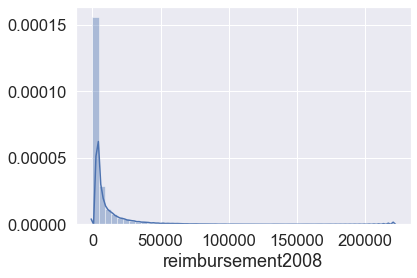

In [37]:
sns.distplot(df2.reimbursement2008);

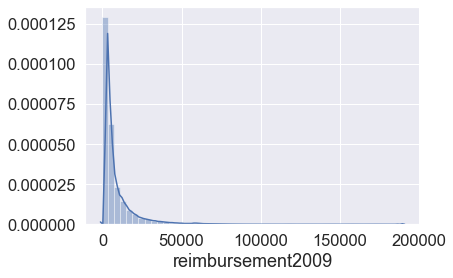

In [38]:
sns.distplot(df2.reimbursement2009);

In [39]:
windsorizer = Winsorizer(distribution='skewed',tail='both',fold=3,
                         variables=['reimbursement2008', 'reimbursement2009'])

In [40]:
windsorizer.fit(df2)

Winsorizer(distribution='skewed', fold=3, tail='both',
           variables=['reimbursement2008', 'reimbursement2009'])

In [41]:
df3 = windsorizer.transform(df2)

In [42]:
df3

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heartfailure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
0,68,0,0,0,1,0,1,0,0,0,0,0,1480.0,1,570.0,1
1,49,1,0,0,0,0,0,0,0,0,0,0,0.0,1,810.0,1
2,93,0,0,0,0,0,0,0,0,0,0,0,430.0,1,540.0,1
3,47,0,0,0,0,0,0,0,0,0,0,0,0.0,1,10.0,1
4,66,1,0,0,0,1,1,0,0,0,1,0,1460.0,1,1210.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245710,61,1,0,0,1,1,1,1,1,1,1,1,15960.0,3,28050.0,5
245711,90,1,0,0,1,1,1,1,1,1,0,0,20680.0,4,28050.0,5
245712,76,0,1,0,1,1,1,1,1,1,1,1,20680.0,5,28050.0,5
245713,82,1,0,0,1,0,1,1,1,1,1,1,20660.0,4,28050.0,5


In [43]:
df3.describe()

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heartfailure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
count,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000,245715.000000
mean,73.179387,0.289242,0.240486,0.103889,0.216271,0.319989,0.563100,0.429184,0.613898,0.258975,0.254710,0.072210,4906.741184,1.713587,6626.176790,1.972916
std,12.887795,0.453411,0.427379,0.305117,0.411702,0.466473,0.496003,0.494961,0.486855,0.438073,0.435699,0.258835,6159.138409,1.020396,7315.470748,0.986604
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,880.000000,1.000000,1690.000000,1.000000
50%,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2220.000000,1.000000,3880.000000,2.000000
75%,82.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5830.000000,2.000000,8280.000000,3.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20680.000000,5.000000,28050.000000,5.000000


In [44]:
windsorizer.left_tail_caps_

{'reimbursement2008': -13970.0, 'reimbursement2009': -18080.0}

In [45]:
windsorizer.right_tail_caps_

{'reimbursement2008': 20680.0, 'reimbursement2009': 28050.0}

### Treat Data Types

In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245715 entries, 0 to 245714
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                245715 non-null  int64  
 1   alzheimers         245715 non-null  int64  
 2   arthritis          245715 non-null  int64  
 3   cancer             245715 non-null  int64  
 4   copd               245715 non-null  int64  
 5   depression         245715 non-null  int64  
 6   diabetes           245715 non-null  int64  
 7   heartfailure       245715 non-null  int64  
 8   ihd                245715 non-null  int64  
 9   kidney             245715 non-null  int64  
 10  osteoporosis       245715 non-null  int64  
 11  stroke             245715 non-null  int64  
 12  reimbursement2008  245715 non-null  float64
 13  bucket2008         245715 non-null  int64  
 14  reimbursement2009  245715 non-null  float64
 15  bucket2009         245715 non-null  int64  
dtypes:

### Drop unwanted features

In [47]:
df3.shape

(245715, 16)

### Train Test Split

In [48]:
X = df3.iloc[:,0:15]
y = df3.iloc[:,15]

In [49]:
X.values, y.values

(array([[6.800e+01, 0.000e+00, 0.000e+00, ..., 1.480e+03, 1.000e+00,
         5.700e+02],
        [4.900e+01, 1.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
         8.100e+02],
        [9.300e+01, 0.000e+00, 0.000e+00, ..., 4.300e+02, 1.000e+00,
         5.400e+02],
        ...,
        [7.600e+01, 0.000e+00, 1.000e+00, ..., 2.068e+04, 5.000e+00,
         2.805e+04],
        [8.200e+01, 1.000e+00, 0.000e+00, ..., 2.066e+04, 4.000e+00,
         2.805e+04],
        [8.000e+01, 1.000e+00, 0.000e+00, ..., 2.068e+04, 4.000e+00,
         2.805e+04]]),
 array([1, 1, 1, ..., 5, 5, 5], dtype=int64))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((196572, 15), (49143, 15), (196572,), (49143,))

### Feature Scaling

In [52]:
X_train

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heartfailure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009
162662,47,1,0,0,0,1,1,0,1,0,0,0,3360.0,2,6010.0
62968,72,0,0,0,0,0,1,0,0,0,0,0,230.0,1,340.0
30152,54,0,0,0,0,0,1,0,0,0,0,0,9660.0,3,2470.0
61846,72,0,0,0,0,0,0,1,0,0,0,0,490.0,1,1580.0
7695,68,0,1,0,0,0,1,1,0,0,0,0,920.0,1,1390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176963,79,0,0,0,0,0,0,0,0,0,0,0,560.0,1,7350.0
117952,66,1,1,0,0,0,1,1,1,1,0,0,1640.0,1,3700.0
173685,71,0,1,0,0,1,1,1,1,0,0,0,4730.0,2,7000.0
43567,76,0,0,0,0,0,0,1,1,1,0,0,20680.0,4,220.0


In [53]:
minmax = MinMaxScaler()

In [54]:
X_train_scaled = minmax.fit_transform(X_train)

In [55]:
X_train_scaled

array([[0.28378378, 1.        , 0.        , ..., 0.16247582, 0.25      ,
        0.21426025],
       [0.62162162, 0.        , 0.        , ..., 0.01112186, 0.        ,
        0.01212121],
       [0.37837838, 0.        , 0.        , ..., 0.46711799, 0.5       ,
        0.08805704],
       ...,
       [0.60810811, 0.        , 1.        , ..., 0.2287234 , 0.25      ,
        0.24955437],
       [0.67567568, 0.        , 0.        , ..., 1.        , 0.75      ,
        0.00784314],
       [0.55405405, 0.        , 0.        , ..., 0.094294  , 0.        ,
        0.39251337]])

In [56]:
X_test_scaled = minmax.transform(X_test)

In [57]:
X_test_scaled

array([[0.81081081, 1.        , 0.        , ..., 0.09912959, 0.        ,
        0.15115865],
       [0.89189189, 0.        , 0.        , ..., 0.04642166, 0.        ,
        0.06024955],
       [0.58108108, 0.        , 0.        , ..., 0.14748549, 0.25      ,
        0.13761141],
       ...,
       [0.62162162, 0.        , 0.        , ..., 0.42311412, 0.5       ,
        1.        ],
       [0.7972973 , 1.        , 1.        , ..., 0.03916828, 0.        ,
        0.08877005],
       [0.59459459, 1.        , 0.        , ..., 0.58075435, 0.5       ,
        0.08841355]])

### Model Training

### Using XGBoost

In [58]:
xgbmodel = XGBClassifier(random_state=0, n_estimators=100, objective='multi:softmax')

In [59]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='merror',early_stopping_rounds=30)

[0]	validation_0-merror:0.011273
Will train until validation_0-merror hasn't improved in 30 rounds.
[1]	validation_0-merror:0.011273
[2]	validation_0-merror:0.011273
[3]	validation_0-merror:0.011273
[4]	validation_0-merror:0.011273
[5]	validation_0-merror:0.011273
[6]	validation_0-merror:0.011273
[7]	validation_0-merror:0.011273
[8]	validation_0-merror:0.011273
[9]	validation_0-merror:0.011273
[10]	validation_0-merror:0.011273
[11]	validation_0-merror:0.011273
[12]	validation_0-merror:0.011273
[13]	validation_0-merror:0.011273
[14]	validation_0-merror:0.011273
[15]	validation_0-merror:0.011273
[16]	validation_0-merror:0.011273
[17]	validation_0-merror:0.011273
[18]	validation_0-merror:0.011273
[19]	validation_0-merror:0.011273
[20]	validation_0-merror:0.011273
[21]	validation_0-merror:0.011273
[22]	validation_0-merror:0.011273
[23]	validation_0-merror:0.011273
[24]	validation_0-merror:0.011273
[25]	validation_0-merror:0.011273
[26]	validation_0-merror:0.011273
[27]	validation_0-merror:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [60]:
y_pred = xgbmodel.predict(X_test_scaled)

In [61]:
y_pred

array([2, 1, 2, ..., 4, 1, 1], dtype=int64)

### Model Evaluation

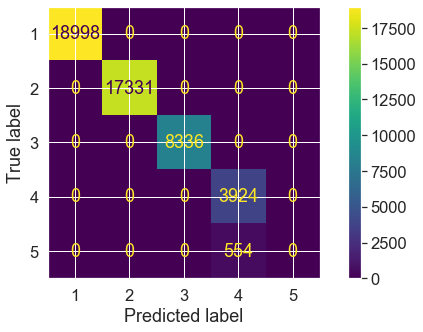

In [62]:
fig , ax = plt.subplots(figsize=(10,5))
plot_confusion_matrix(xgbmodel,X_test_scaled,y_test,values_format='.5g',ax=ax)
plt.show()

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     18998
           2       1.00      1.00      1.00     17331
           3       1.00      1.00      1.00      8336
           4       0.88      1.00      0.93      3924
           5       0.00      0.00      0.00       554

    accuracy                           0.99     49143
   macro avg       0.78      0.80      0.79     49143
weighted avg       0.98      0.99      0.98     49143



### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [64]:
X.columns

Index(['age', 'alzheimers', 'arthritis', 'cancer', 'copd', 'depression',
       'diabetes', 'heartfailure', 'ihd', 'kidney', 'osteoporosis', 'stroke',
       'reimbursement2008', 'bucket2008', 'reimbursement2009'],
      dtype='object')

In [65]:
xgbmodel.get_booster().feature_names = ['age', 'alzheimers', 'arthritis', 'cancer', 'copd', 'depression',
       'diabetes', 'heartfailure', 'ihd', 'kidney', 'osteoporosis', 'stroke',
       'reimbursement2008', 'bucket2008', 'reimbursement2009']

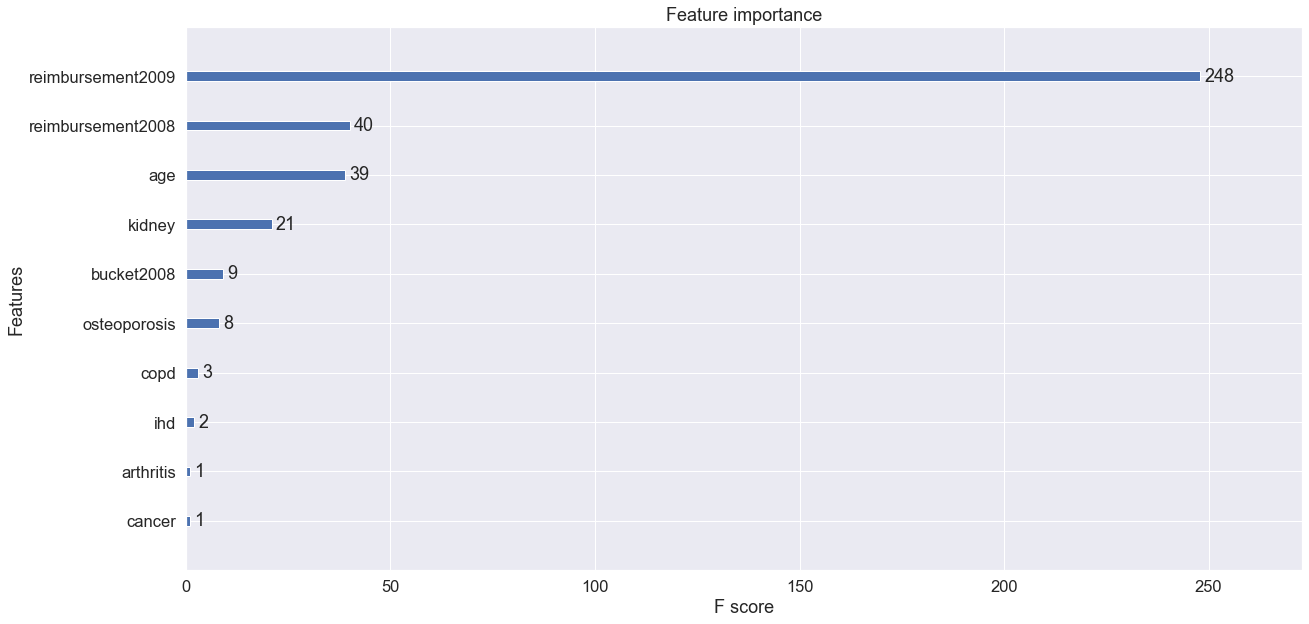

In [66]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax)
plt.show()

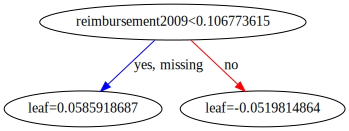

In [67]:
xgb.to_graphviz(xgbmodel,num_trees=100)

### Cross-Validation

In [68]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.6min finished


In [69]:
cv.mean()

0.8803939523431618